

# IMDB Movies in depth

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Hey all in this report we going to see and understand movies production from 1965 to 2015, as we get IMDB data for all the 
movies, cast, and ratings, etc..


> Hope you enjoy as i did in making this report 

>After cleaning our data we gonna start


>Let's start with questions

>1-How Budget, Revenue, Profit Changed Over The Years?

>2-which genres had much (production, budget, revenue, profit) than the others?

>3-Does movie runtime affects popularity?

>4-whta is The Relation Between Popularity and Vote AVG?

>5-How Budget changed over the years?

>6-what are the top 10 directors based on (number of production, budget, revenue, profit)?

>7-what are the top 10 actors based on (popularity, budget, revenue, profit)?

>8-Which months had the most profit and revenue over the years?

>9-Does popularity affect revenue and profit?

>10-Top 15 movies by profit compared to their budget and revenue 



In [3]:
#here imoorting my libarries i am gonna use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import calendar

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, i will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

In [4]:
# Here i am gonna read my file and check
df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#here to check unwanted columns and to detect if there any null values to delete them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# dropping unwanted columns
col=['homepage','tagline','keywords','overview','imdb_id','production_companies','vote_count']
df.drop(col, axis=1, inplace=True)

In [7]:
#changing column data types and creating new columns i will use later 
df['budget_adj']=df['budget_adj'].astype(int)
df['revenue_adj']=df['revenue_adj'].astype(int)
df['profit']=df['revenue_adj']-df['budget_adj']
df['PProfit']=df['revenue']-df['budget']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  int32  
 13  revenue_adj     10866 non-null  int32  
 14  profit          10866 non-null  int32  
 15  PProfit         10866 non-null  int64  
dtypes: float64(2), int32(3), int64(6), object(5)
memory usage: 1.2+ MB


In [8]:
#drop dublicates values and null values
df.drop_duplicates(inplace = True)

In [9]:
df.dropna(inplace=True)

In [10]:
# checking for any null value left
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
profit            0
PProfit           0
dtype: int64

In [11]:
#checking for everything worked as planned
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_average    10731 non-null  float64
 11  release_year    10731 non-null  int64  
 12  budget_adj      10731 non-null  int32  
 13  revenue_adj     10731 non-null  int32  
 14  profit          10731 non-null  int32  
 15  PProfit         10731 non-null  int64  
dtypes: float64(2), int32(3), int64(6), object(5)
memory usage: 1.3+ MB


In [12]:
#Need to Seperate all the values 
df['director'] = df['director'].apply(lambda x: x.split("|")[0])
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])
df['cast'] = df['cast'].apply(lambda x: x.split("|")[0])

<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning and wrangling the data , now lets explore the data set 

### How Budget, Revenue, Profit Changed Over The Years?

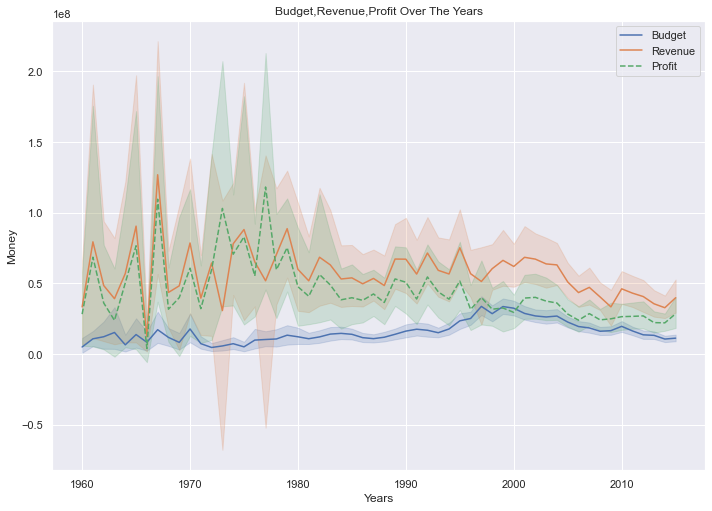

In [13]:
#drawing the char to show relation between (budget, revenue, profit) through the years
sns. set_style('dark') 
budg=df.groupby('release_year')['budget_adj'].sum()
reven=df.groupby('release_year')['revenue_adj'].sum()
prof=df.groupby('release_year')['profit'].sum()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.lineplot(data=df,x='release_year',y='budget_adj')
ax1=sns.lineplot(data=df,x='release_year',y='revenue_adj')
ax2=sns.lineplot(data=df,x='release_year',y='profit',linestyle='--')
plt.legend(labels=["Budget","Revenue","Profit"])
plt.xlabel("Years")
plt.ylabel("Money")

plt.title("Budget,Revenue,Profit Over The Years")
plt.show()


>Here we can find that Budget and profit and revenue changed over the years , at mid 60's to 80's it was not stable market everyting changed was not stable , in late 90's budget saw a little increase with decrease in profit , after 90's period and from early 2000's till 2015 budget was only decreasing and profit got higher than 90's

### which genres had much (production, budget, revenue, profit) than the others?

In [14]:
#geners that cost Much and get much
genres=df['genres']
genres=pd.DataFrame(genres)
genres['count']=df.groupby('genres')['genres'].transform('count')
genres.drop_duplicates(inplace=True)

genres['profit']=df.groupby('genres')['profit'].transform('sum')

genres['revenue']=df.groupby('genres')['revenue_adj'].transform('sum')


genres['budget']=df.groupby('genres')['budget_adj'].transform('sum')


genres.reset_index()


,index,genres,count,profit,revenue,budget
0,0,Action,1587,7.013208e+10,1.127014e+11,4.686428e+10
1,2,Adventure,585,6.864502e+10,9.265267e+10,2.830262e+10
2,5,Western,42,8.835461e+08,1.986910e+09,1.103364e+09
3,6,Science Fiction,211,1.487879e+10,2.129687e+10,6.418079e+09
4,7,Drama,2443,5.547518e+10,7.880377e+10,3.191852e+10
5,8,Family,142,8.161462e+09,1.112380e+10,2.962342e+09
6,9,Comedy,2313,6.009235e+10,8.899779e+10,2.890543e+10
7,15,Crime,380,1.157839e+10,1.780941e+10,6.231022e+09
8,18,Romance,185,6.388747e+09,8.782017e+09,2.393270e+09
9,19,War,58,1.367587e+09,2.875843e+09,1.508256e+09


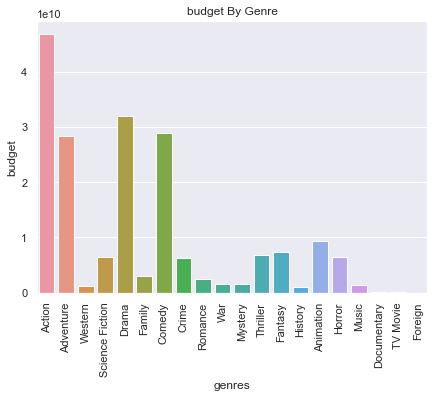

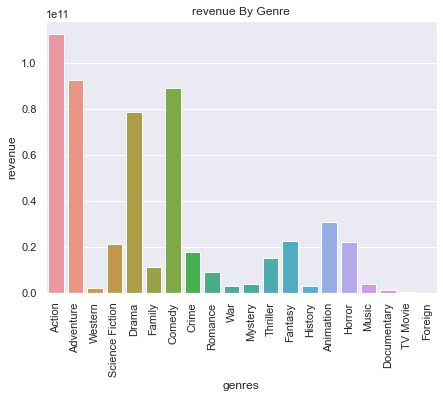

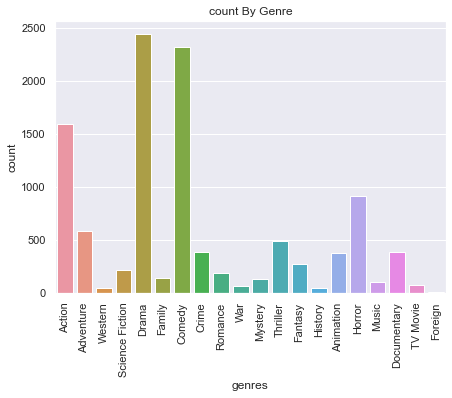

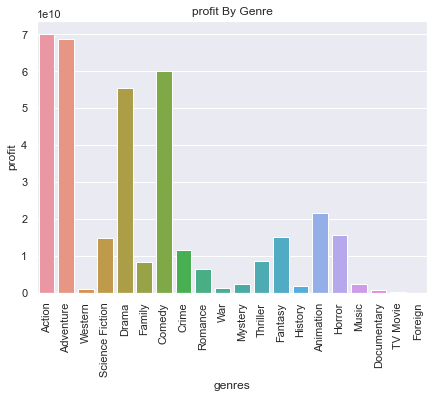

In [15]:
sns.set(rc={'figure.figsize':(7,5)})
lis=['budget','revenue','count','profit']
for i in lis:
    ax=sns.barplot(data=genres,x='genres',y=i)
    plt.xticks(rotation=90)
    plt.title("{} By Genre".format(i))
    plt.show()

> As in visuals above me we can find genres ( drama and comedy and action ) had the most production over the years , while genres like (forign and history and Tv show ) were the least in term of production


> producer liked to invest in (action ,drama,adventuer,comedy) they putted heavy budget in those genres specifec , becuase those genres gain much revenue there for they will gain much profit

## Does movie runtime affects popularity? 

Runtime AVG is 102.46882862734135 and Popularity AVG is 0.6526147338551861


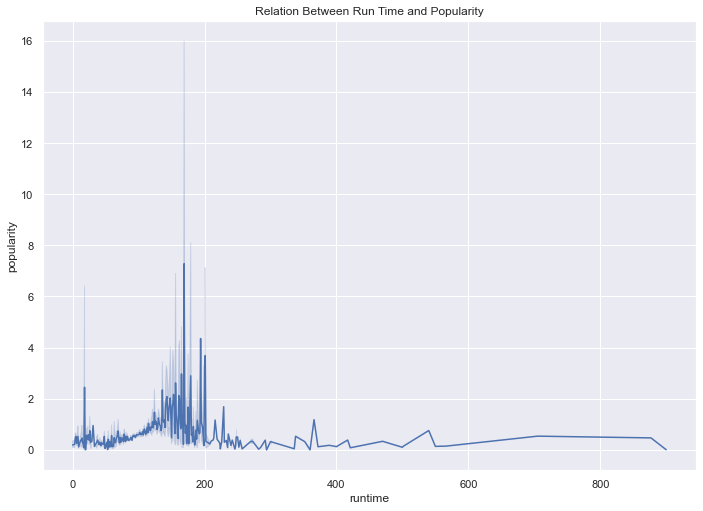

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.lineplot(data=df,x='runtime',y='popularity')
plt.title("Relation Between Run Time and Popularity")
rn_avg=df['runtime'].mean()
pop_avg=df['popularity'].mean()
print("Runtime AVG is {} and Popularity AVG is {}".format(rn_avg,pop_avg))

> **The answer is YES**


>user tends to like and enjoy movies with 150 to 200 screen play time after 200 minutes popularity shrinks dramaticly

## what is The Relation Between Popularity and Vote AVG?

Text(0.5, 1.0, 'Relation Between Popularity and Vote AVG ')

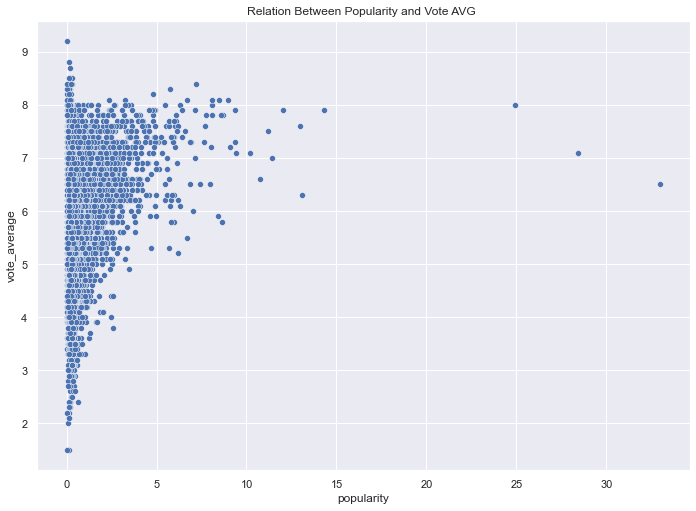

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax=sns.scatterplot(data=df,x='popularity',y='vote_average')
plt.title("Relation Between Popularity and Vote AVG ")

> The relation between popularity and vote avg is **Inverse** the less the popularity the more the Vote Avg

## How Budget changed over the years?

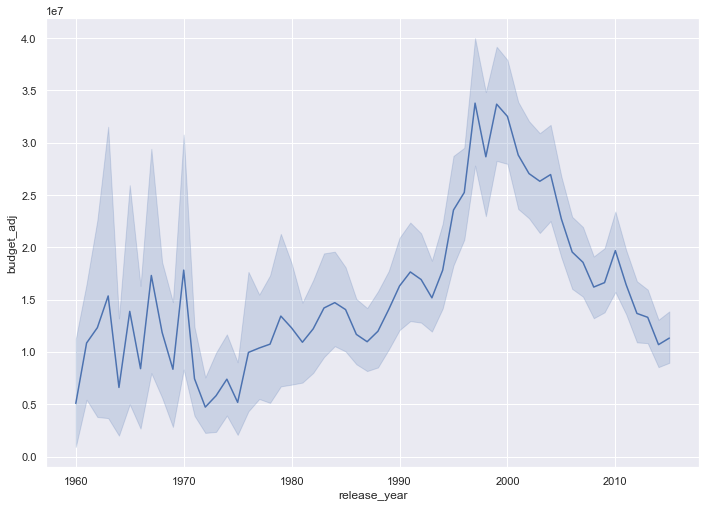

In [18]:
ax=sns.lineplot(data=df,x='release_year',y='budget_adj')

> Budget at 60's to early 70s was not stable , then got increase at the mid 70s and kept going up and reached the highest point at late 90s and early 2000s , then it went down since then

## what are the top 10 directors based on (number of production, budget, revenue, profit)?

In [19]:
#lets Dig In Director Data
x=df['director']
x=pd.DataFrame(x)
x['Number of Movies']=df.groupby('director')['director'].transform('count')
x.drop_duplicates(inplace=True)
count=x.nlargest(10,"Number of Movies")
x['Pop']=df.groupby('director')['popularity'].transform('mean')
Pop=x.nlargest(10,'Pop')
x['budget']=df.groupby('director')['budget_adj'].transform('sum')
bud=x.nlargest(10,'budget')
x['revenue']=df.groupby('director')['revenue_adj'].transform('sum')
rev=x.nlargest(10,'revenue')
x['profit']=df.groupby('director')['profit'].transform('sum')
prof=x.nlargest(10,'profit')
rt_pop=df.groupby('runtime')['popularity'].mean()

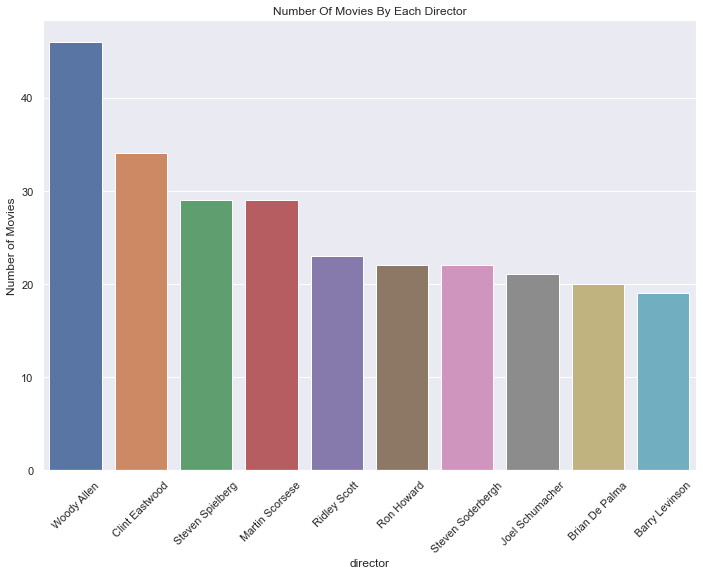

In [20]:
ax=sns.barplot(x='director',y='Number of Movies',data=count)
plt.xticks(rotation=45)
plt.title("Number Of Movies By Each Director")
plt.show()

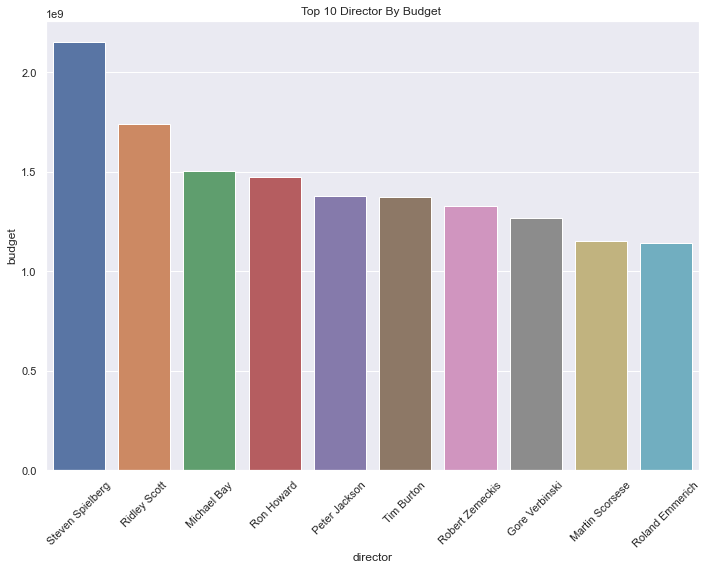

In [21]:
ax=sns.barplot(x='director',y='budget',data=bud)
plt.title("Top 10 Director By Budget ")
plt.xticks(rotation=45)
plt.show()

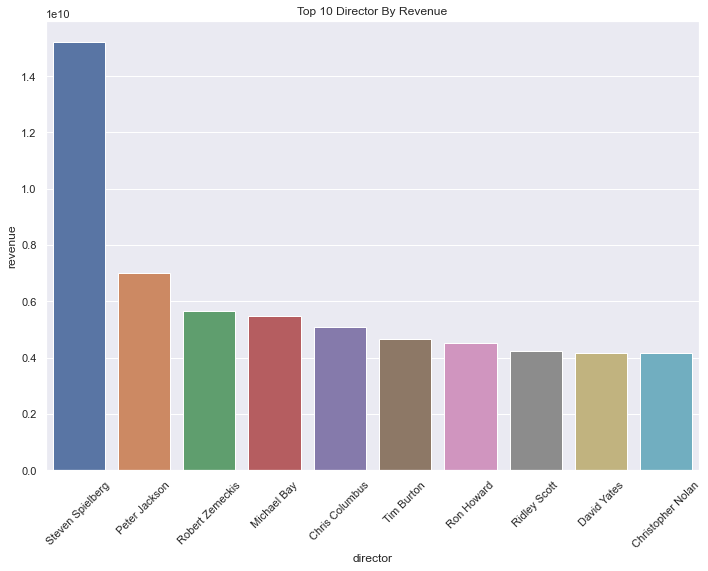

In [22]:
ax=sns.barplot(x='director',y='revenue',data=rev)
plt.title("Top 10 Director By Revenue")
plt.xticks(rotation=45)
plt.show()

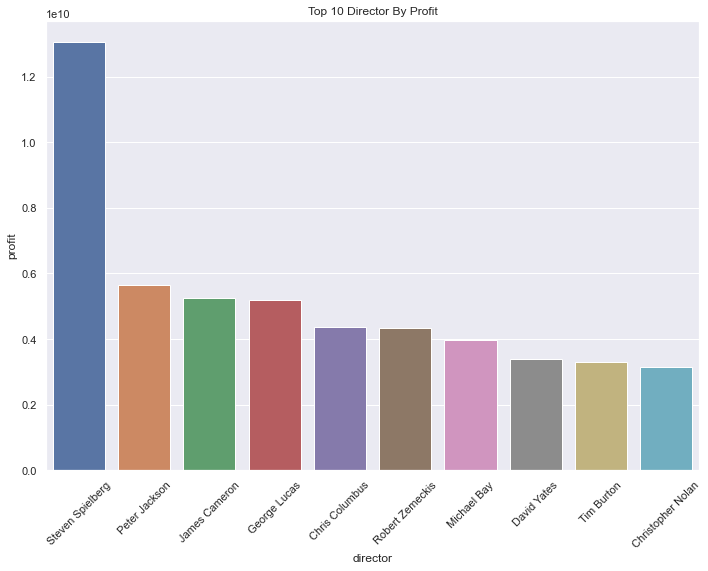

In [23]:
ax2=sns.barplot(x='director',y='profit',data=prof)
plt.title("Top 10 Director By Profit")
plt.xticks(rotation=45)
plt.show()

> Here we will find punch of the greatis director of all times with great number of production, Woody Allan with 49 films made then Clint Eastwood with 34 films at the top of most production over the years

> Producers tends to give big budget to big directors , as the visuals above directors when they get big budget they tends to make movie that returns big revenue and profit

## what are the top 10 actors based on (popularity, budget, revenue, profit)?

In [24]:
#Cast analsys 
cast=df['cast']
cast=pd.DataFrame(cast)
cast['Number of Movies']=df.groupby('cast')['cast'].transform('count')
cast.drop_duplicates(inplace=True)
count=cast.nlargest(10,"Number of Movies")
cast['Pop']=df.groupby('cast')['popularity'].transform('mean')
Pop=cast.nlargest(10,'Pop')
cast['budget']=df.groupby('cast')['budget_adj'].transform('sum')
bud=cast.nlargest(10,'budget')
cast['revenue']=df.groupby('cast')['revenue_adj'].transform('sum')
rev=cast.nlargest(10,'revenue')
cast['profit']=df.groupby('cast')['profit'].transform('sum')
prof=cast.nlargest(10,'profit')

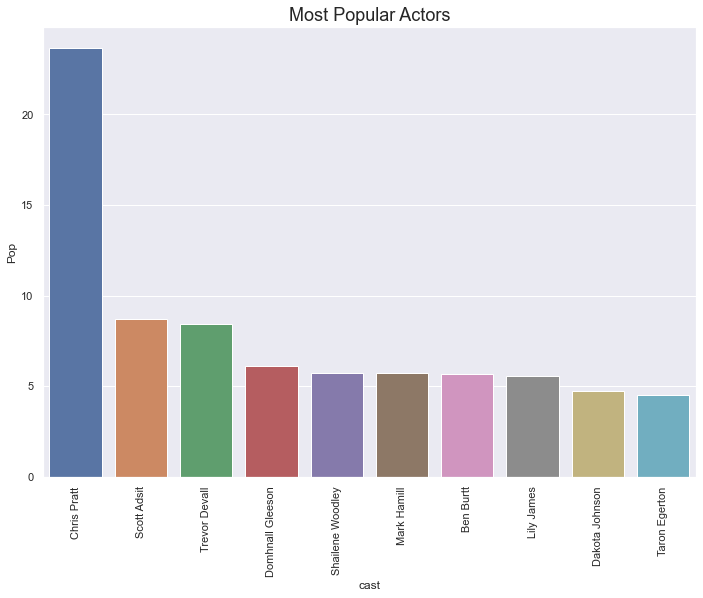

In [25]:
ax=sns.barplot(data=Pop,x='cast',y="Pop")
plt.title("Most Popular Actors",fontsize=18)
plt.xticks(rotation=90)
plt.show()

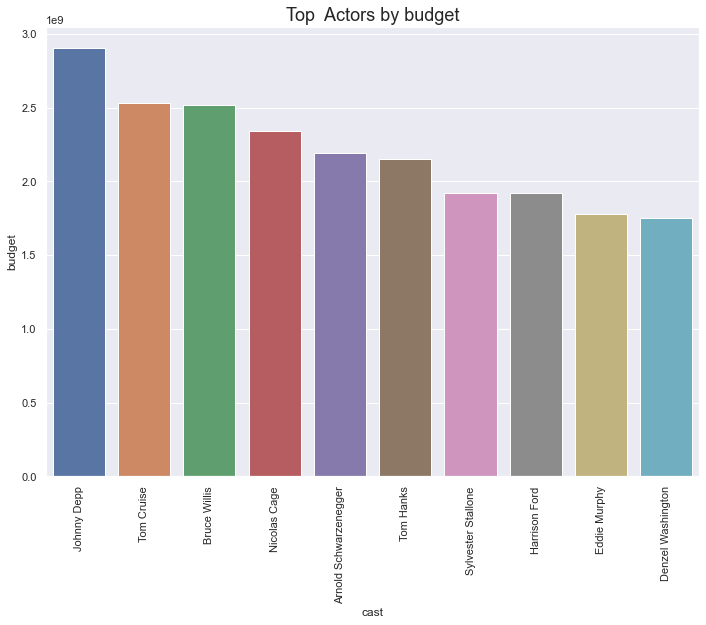

In [26]:
ax=sns.barplot(data=bud,x='cast',y="budget")
plt.title("Top  Actors by budget",fontsize=18)
plt.xticks(rotation=90)
plt.show()

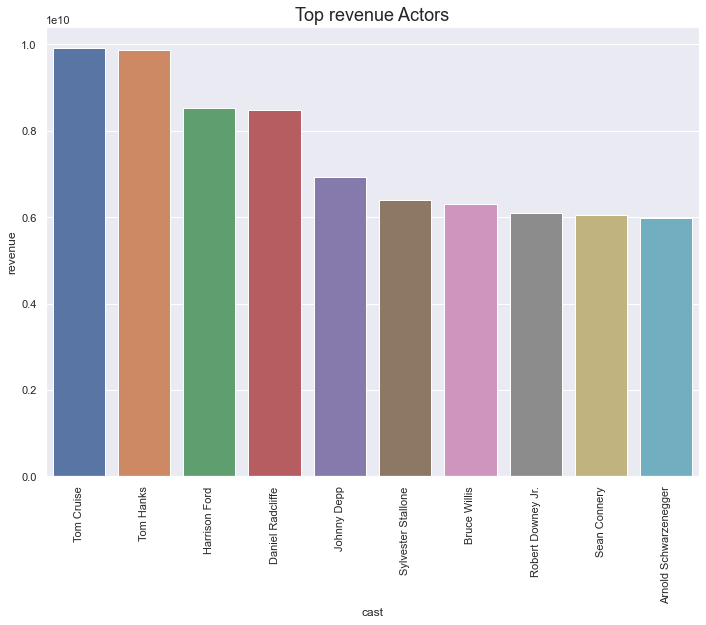

In [27]:
ax=sns.barplot(data=rev,x='cast',y="revenue")
plt.title("Top revenue Actors",fontsize=18)
plt.xticks(rotation=90)
plt.show()

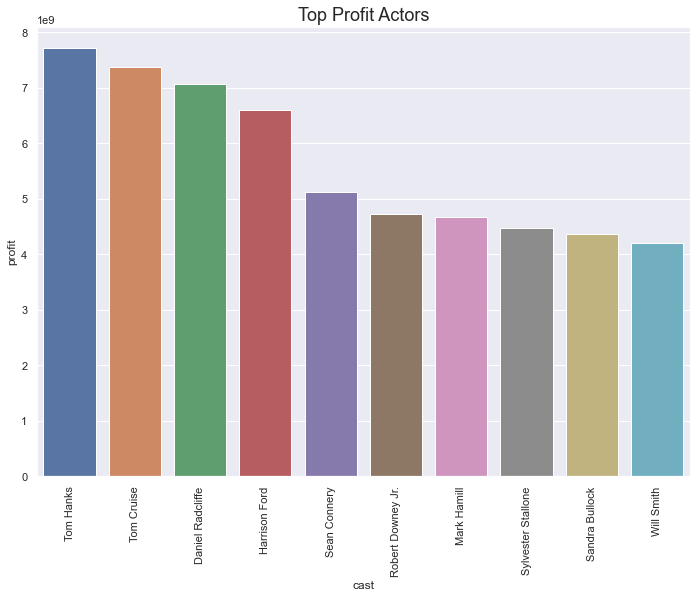

In [28]:
ax=sns.barplot(data=prof,x='cast',y="profit")
plt.xticks(rotation=90)
plt.title("Top Profit Actors",fontsize=18)
plt.show()

> As above visuals we find that most popular actor is Chris Pratt with huge gap between him and second place 

> Despite Johnny Depp get huge budget but his placed fifth in revenue and not even in top 10 list in top profit actors 

> Tom Hanks and Tom Cruise made a huge revenue and profit 

## Does popularity affect revenue and profit?

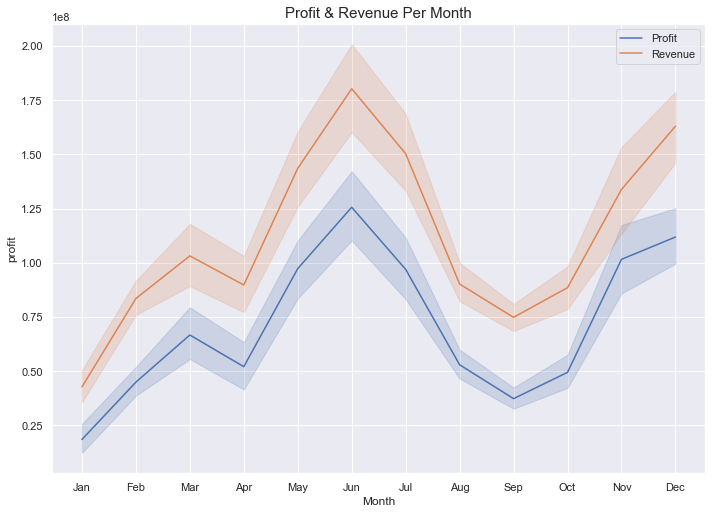

In [29]:
#lets Check , Does month affect profit and Revenue
sns.set(rc={'figure.figsize':(11.7,8.27)})
prof_month=df['release_date']
prof_month=pd.DataFrame(prof_month)
prof_month['Month']= pd.DatetimeIndex(df['release_date']).month
prof_month.sort_values("Month",inplace=True)
prof_month['profit']=df.groupby('release_date')['profit'].transform('sum')
prof_month['revenue']=df.groupby('release_date')['revenue_adj'].transform('sum')

prof_month['Month'] = prof_month['Month'].apply(lambda x: calendar.month_abbr[x])

ax=sns.lineplot(data=prof_month,x='Month',y='profit')
ax=sns.lineplot(data=prof_month,x='Month',y='revenue')
plt.legend(labels=["Profit","Revenue"])
plt.title("Profit & Revenue Per Month",fontsize=15)
plt.show()

> proift and revenue in early months of the year tends to be lowest point and get highest point in June then get low again and only get higher again by Oct and keeps going up till the end of Dec

## Does popularity affect revenue and profit?

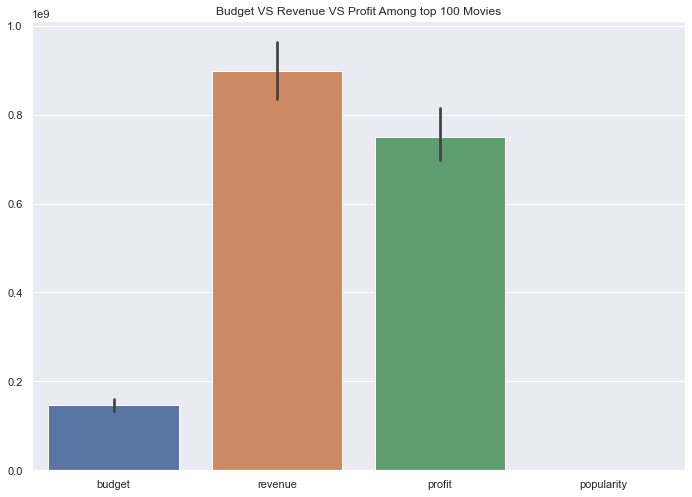

In [30]:
Movies_data=df['original_title']
Movies_data=pd.DataFrame(Movies_data)
Movies_data['Movies']=df['original_title']
Movies_data['budget']=df.groupby('original_title')['budget'].transform('sum')
Movies_data['revenue']=df.groupby('original_title')['revenue'].transform('sum')
Movies_data['profit']=df.groupby('original_title')['PProfit'].transform('sum')
Movies_data['popularity']=df.groupby('original_title')['popularity'].transform('mean')

Movies_data.drop_duplicates(inplace=True)
Movies_data.set_index('original_title',inplace=True)
# Movies_data.nlargest(10,'profit').plot(kind='bar',figs=(15,20))
ax=sns.barplot(data=Movies_data.nlargest(100,'profit'))
plt.title("Budget VS Revenue VS Profit Among top 100 Movies")
plt.show()

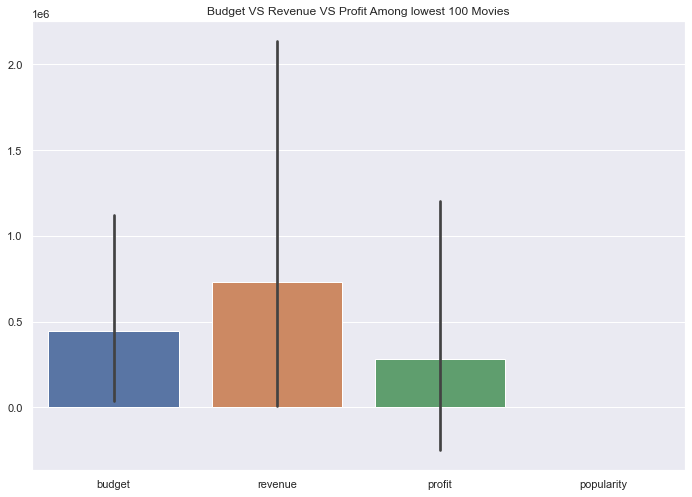

In [31]:
ax=sns.barplot(data=Movies_data.nsmallest(100,'popularity'))
plt.title("Budget VS Revenue VS Profit Among lowest 100 Movies")
plt.show()

> **The More The Popularity The More The Revenue and Profit**

> Movies with high popularity always have huge profit and revenue and loaw budget than movies with low popularity

## Top 15 movies by profit compared to their budget and revenue

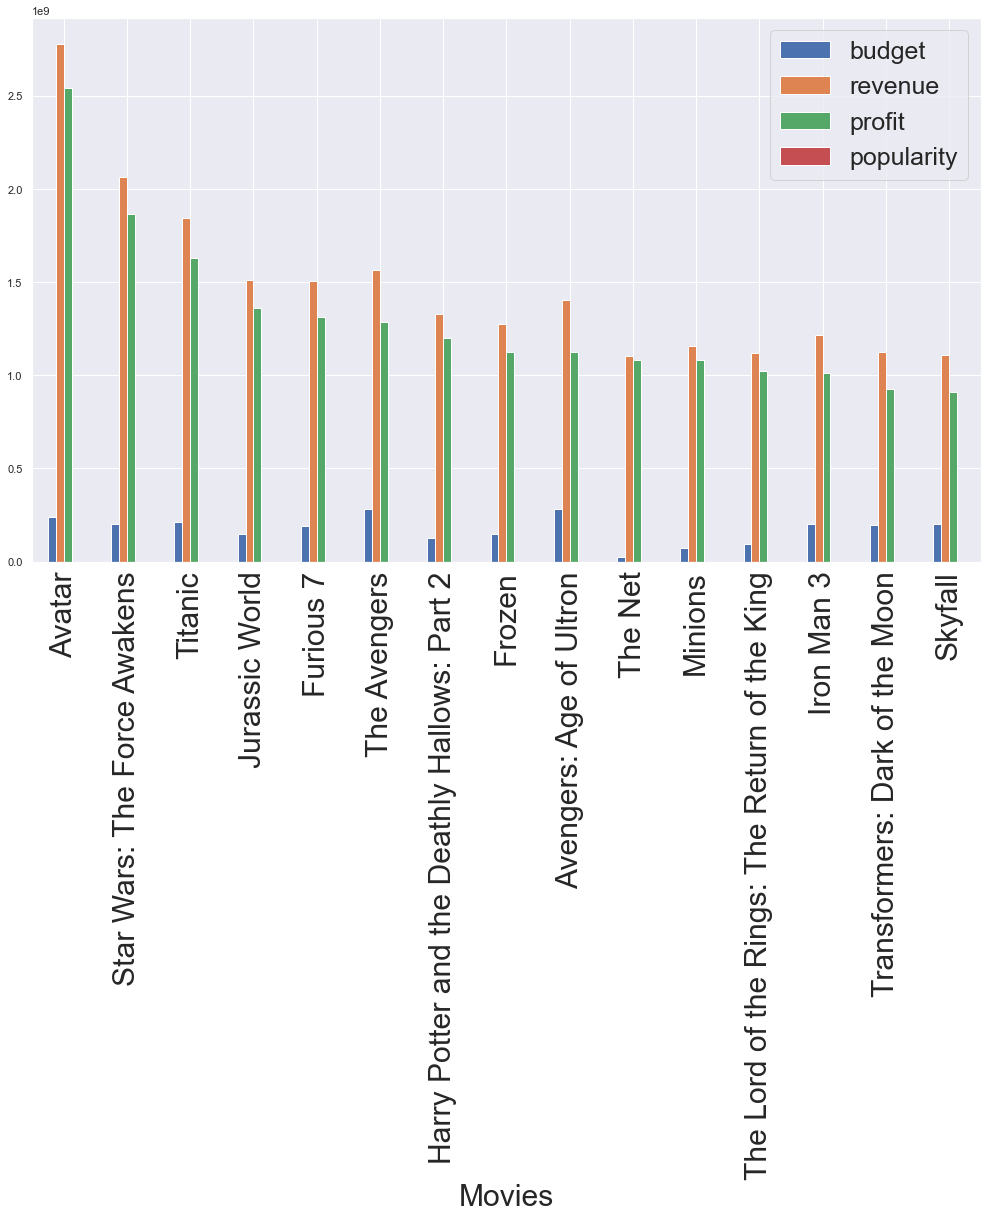

In [32]:
Movies_data.nlargest(15,'profit').plot(kind='bar',figsize=(17,10))
plt.xlabel('Movies', fontsize=30)
plt.xticks(fontsize=30)
plt.legend(fontsize=25)
plt.show()

<a id='conclusions'></a>
## Conclusions

> That was a great Project to work with , i really gained much

> From all analsys above and visuals , we can say movies budget getting decreased after 2000 , profit is not increasing but stable from 2000 to 2015 , if you want to make profitable movie  you want it to be in these genres (Drama , Comedy , Action)

> Make populare Movie = More Profit, More revenue of course , choose Popular actor with popular director 

> Dont make long movies , stick with 123 minutes to 200  it's more popular 

> Most of the top directors when they have big budget they can return huge profit 

> Actors with huge budget don't always return huge profit **Look at Johnny Depp**

>Tom Cruise, Chris Pratt, Tom Hanks, Daniel Radcliff .. Should be in your movie 

> Always try to release your movie in Jun and period from Oct to Dec

## limitation 
> i don't think the data is 100% right

> there was nulls and 0 

> zero's in budget and revenue caused unacurracy data for sure and dropping them will shrink the data set 